In [226]:
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
data = 'gradcafe.csv'

In [5]:
n = 0
with open(data,'rb') as df:
    for line in df:
        n += 1
n

10337

In [242]:
df = pd.read_csv(data)

In [11]:
gradcafe.columns

Index(['Unnamed: 0', 'institution', 'program', 'degree', 'season',
       'admission_status', 'admission_via', 'admission_date', 'ST',
       'Date_added', 'notes', 'Undergrad_GPA', 'GRE_V', 'GRE_Q', 'GRE_W',
       'GRE_sub'],
      dtype='object')

In [243]:
# scale GPA
df.Undergrad_GPA = np.where((df.Undergrad_GPA > 4)&(df.Undergrad_GPA <= 5), df.Undergrad_GPA*4/5, df.Undergrad_GPA)
df.Undergrad_GPA = np.where((df.Undergrad_GPA > 5)&(df.Undergrad_GPA <= 10), df.Undergrad_GPA*4/10, df.Undergrad_GPA)

In [244]:
# scale GRE: old to new
GRE = pd.DataFrame(list(zip(np.arange(200, 810, 10).tolist(), np.repeat(130, 4).tolist()+np.arange(131, 143).tolist()+[143, 143, 144, 145, 146, 146, 147, 148, 149, 149, 150, 151, 151, 152, 152, 153, 154, 154, 155, 156, 156, 157, 158, 158, 159, 160, 160, 161, 162, 162, 163, 164, 164, 165, 165, 166, 167, 168, 168, 169, 169, 170, 170, 170, 170, 170])), columns=['old', 'new'])

for index, row in df.iterrows():
    if df.loc[index, 'GRE_V']>200:
        df.loc[index, 'GRE_V']=GRE.new[GRE.old == df.loc[index, 'GRE_V']].to_numpy()
    if gradcafe.loc[index, 'GRE_Q']>200:
        df.loc[index, 'GRE_Q']=GRE.new[GRE.old == df.loc[index, 'GRE_Q']].to_numpy()
# correct unexpected input: 179 to 169, 180 to 170
df.loc[df.GRE_V==179, 'GRE_V']=169
df.loc[df.GRE_V==180, 'GRE_V']=170
df.loc[df.GRE_V<130, 'GRE_V']=np.nan
df.loc[df.GRE_Q==179, 'GRE_Q']=169
df.loc[df.GRE_Q==180, 'GRE_Q']=170
df.loc[df.GRE_Q<130, 'GRE_Q']=np.nan

In [245]:
# correct unexpected season
df.loc[df.season=='?', 'season']='F09'

1. GPA by year
2. GPA by degree
3. Location by degree

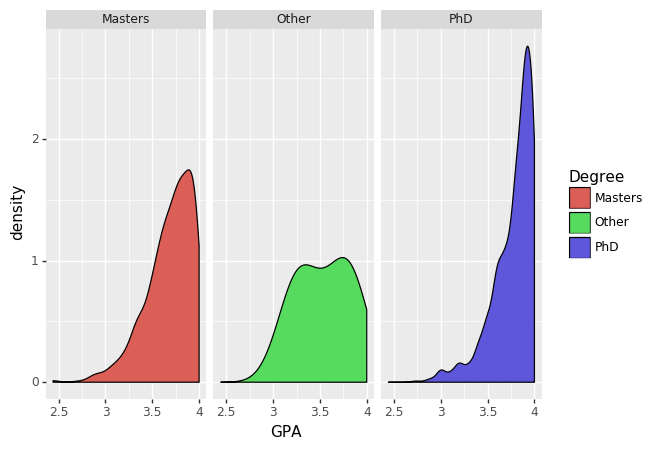

<ggplot: (-9223371905436552696)>

In [248]:
# GPA by degree
gg = p9.ggplot(df[~pd.isna(df.Undergrad_GPA)], p9.aes(x='Undergrad_GPA', fill='degree'))
gg += p9.geom_density()
gg += p9.scale_fill_discrete(name='Degree')
gg += p9.facet_wrap('~degree')
gg += p9.labs(x='GPA')
gg
# As expected, PhD applicants have much higher GPA

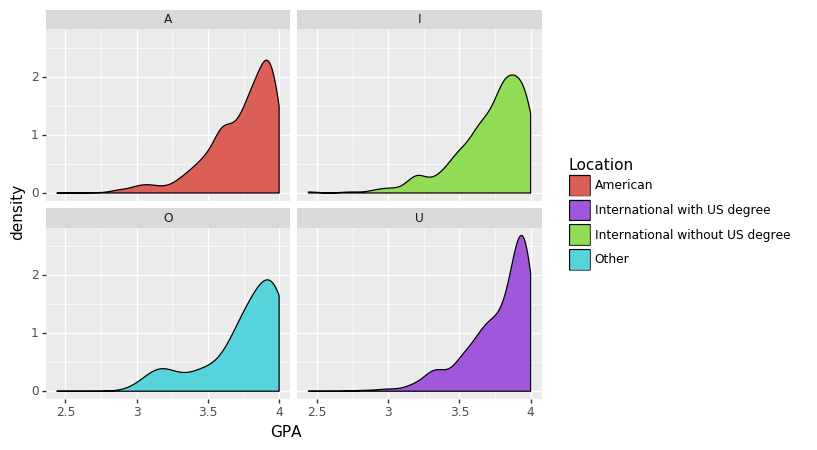

<ggplot: (-9223371905436552832)>

In [252]:
# GPA by location
loc = ['American', 'International with US degree', 'International without US degree', 'Other']

gg = p9.ggplot(df[(~pd.isna(df.Undergrad_GPA))&(~pd.isna(df.ST))], p9.aes(x='Undergrad_GPA', fill='ST'))
gg += p9.geom_density()
gg += p9.scale_fill_discrete(name='Location',breaks=['A', 'U', 'I', 'O'] , labels=loc)
gg += p9.facet_wrap('~ST')
gg += p9.labs(x='GPA')
gg
# International students with US degree tend to have higher GPA

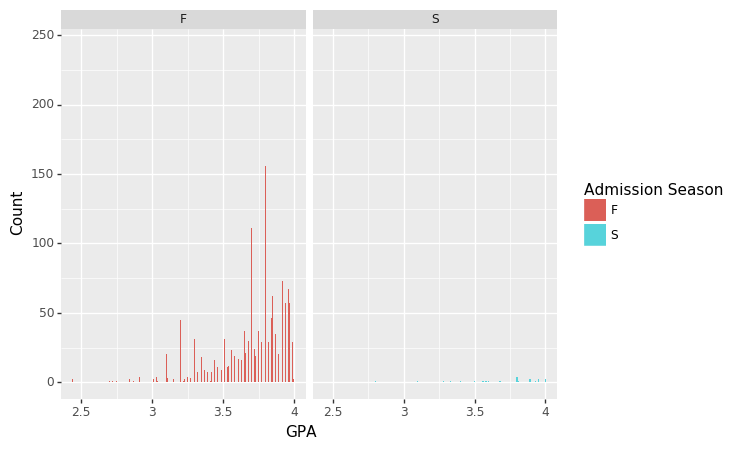

<ggplot: (-9223371905437046020)>

In [255]:
# GPA by season
df['fors'] = df.season.str[0:1]

gg = p9.ggplot(df.loc[(~pd.isna(df.Undergrad_GPA)), ], p9.aes(x='Undergrad_GPA', fill='fors'))
gg += p9.geom_col(stat='count') # add col geom
gg += p9.scale_fill_discrete(name='Admission Season')
gg += p9.facet_wrap('~fors')
gg += p9.labs(x = 'GPA', y = 'Count')
gg

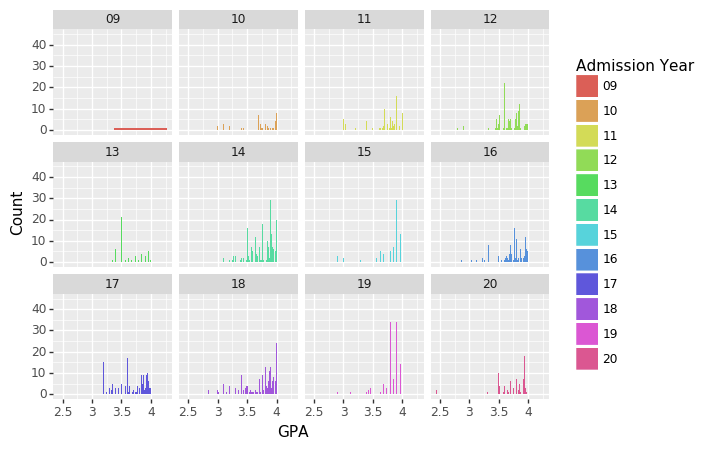

<ggplot: (-9223371905437351044)>

In [254]:
# GPA by year
df['year'] = df.season.str[1:]

gg = p9.ggplot(df.loc[(~pd.isna(df.Undergrad_GPA)), ], p9.aes(x='Undergrad_GPA', fill='factor(year)'))
gg += p9.geom_col(stat='count') # add col geom
gg += p9.scale_fill_discrete(name='Admission Year')
gg += p9.facet_wrap('~year')
gg += p9.labs(x = 'GPA', y = 'Count')
gg